STATIONARY

In [2]:
%matplotlib inline

Running:  Epsilon
iteration :  0
iteration :  100
iteration :  200
iteration :  300
iteration :  400
iteration :  500
iteration :  600
iteration :  700
iteration :  800
iteration :  900
iteration :  1000
iteration :  1100
iteration :  1200
iteration :  1300
iteration :  1400
iteration :  1500
iteration :  1600
iteration :  1700
iteration :  1800
iteration :  1900
Running:  UCB
iteration :  0
iteration :  100
iteration :  200
iteration :  300
iteration :  400
iteration :  500
iteration :  600
iteration :  700
iteration :  800
iteration :  900
iteration :  1000
iteration :  1100
iteration :  1200
iteration :  1300
iteration :  1400
iteration :  1500
iteration :  1600
iteration :  1700
iteration :  1800
iteration :  1900
Running:  Opt
iteration  0
iteration  100
iteration  200
iteration  300
iteration  400
iteration  500
iteration  600
iteration  700
iteration  800
iteration  900
iteration  1000
iteration  1100
iteration  1200
iteration  1300
iteration  1400
iteration  1500
iteration  160

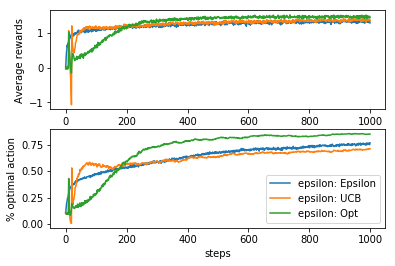

In [3]:
import  numpy as np
import matplotlib.pyplot as plt

num_arms = 10

fig, axs = plt.subplots(2)

def run(q_true, epsilon, episodes):
    optimal_actions = np.argmax(q_true)
    action_counts = np.zeros(num_arms)
    q_pred = np.zeros(num_arms)
    episode_rewards = []
    opt_action_cnt = []

    for eps in range(episodes):
        
        if np.random.random() < epsilon:
            action_index = np.random.randint(num_arms)
        else:
            greedy = np.argmax(q_pred)
            actions = np.where(q_pred == np.argmax(q_pred))[0]
            
            if len(actions) == 0:
                action_index = greedy
            else:
                action_index = np.random.choice(actions)

    
        if action_index == optimal_actions:
            opt_action_cnt.append(1)
        else:opt_action_cnt.append(0)
                
        reward = np.random.normal(q_true[action_index])
        
        action_counts[action_index] += 1
        # alpha = 1 / action_counts[action_index]
        alpha = 0.1
        q_pred[action_index] = q_pred[action_index] +\
                        alpha * (reward-q_pred[action_index])
        
        episode_rewards.append(reward)
        # q_true += np.random.normal(0.0, 0.01)
    
    return episode_rewards, opt_action_cnt

def get_ucb_action(q_pred, step, action_counts, c_=2.0):
    value = q_pred + c_ * (np.log(step+1) / (action_counts+1e-4))**0.5
    action_index = np.argmax(value)
    return action_index

def run_ucb(q_true, epsilon, episodes):
    optimal_actions = np.argmax(q_true)
    action_counts = np.zeros(num_arms)
    q_pred = np.zeros(num_arms)
    episode_rewards = []
    opt_action_cnt = []
    for eps in range(episodes):
        action_index = get_ucb_action(q_pred, eps, action_counts)         
        if action_index == optimal_actions:
            opt_action_cnt.append(1)
        else:opt_action_cnt.append(0)

        reward = np.random.normal(q_true[action_index])
        
        action_counts[action_index] += 1
#         alpha = 1 / action_counts[action_index]
        alpha = 0.1
        q_pred[action_index] = q_pred[action_index] +\
                        alpha * (reward-q_pred[action_index])
        
        episode_rewards.append(reward)
        # q_true += np.random.normal(0.0, 0.01)
    
    return episode_rewards, opt_action_cnt

def run_greedy(q_t, episodes):
    optimal_actions = np.argmax(q_t)
    action_counts = np.zeros(num_arms)
    q_pred = np.zeros(num_arms) + 5.

    episode_rewards = []
    q_true = q_t
    opt_action_cnt = []
    for eps in range(episodes):
    
     
        action_index = np.argmax(q_pred)
        if action_index == optimal_actions:
            opt_action_cnt.append(1)
        else:opt_action_cnt.append(0)
    
        reward = np.random.normal(q_true[action_index])
        
        action_counts[action_index] += 1
#         alpha = 1 / action_counts[action_index]
        alpha = 0.1
        q_pred[action_index] = q_pred[action_index] +\
                        alpha * (reward-q_pred[action_index])
        
        episode_rewards.append(reward)
        # q_true += np.random.normal(0.0, 0.01, num_arms)
    return episode_rewards, opt_action_cnt

def run_env():
    num_bandits = 2000
    num_episodes = 1000
    num_arms = 10
#     epsilons = [0, 0.1, 0.01]
    epsilons = {'Epsilon': 0.1, 'UCB':1.0, 'Opt': 0.1}
    for eps in epsilons:
        print('Running: ', eps)
        episode_rew = np.zeros(num_episodes)
        episode_cnt = np.zeros(num_episodes)
        if eps == 'Epsilon':
            for i in range(num_bandits):
                q_true = np.random.normal(0.0, 1.0, num_arms)

                if i % 100 == 0:
                    print('iteration : ', i)
                rew, cnt = run(q_true, epsilons[eps], num_episodes)
                episode_rew += np.array(rew)
                episode_cnt += np.array(cnt)

            avg_rew = episode_rew / num_bandits
            avg_cnt = episode_cnt / num_bandits
        elif eps == 'UCB':
            for i in range(num_bandits):
                q_true = np.random.normal(0.0, 1.0, num_arms)

                if i % 100 == 0:
                    print('iteration : ', i)
                rew, cnt = run_ucb(q_true, epsilons[eps], num_episodes)
                episode_rew += np.array(rew)
                episode_cnt += np.array(cnt)

            avg_rew = episode_rew / num_bandits
            avg_cnt = episode_cnt / num_bandits
        elif eps == 'Opt':
            for i in range(num_bandits):
                q_true = np.random.normal(0.0, 1.0, num_arms)
                if i % 100 == 0:
                    print('iteration ', i)

                rew, cnt  = run_greedy(q_true, num_episodes)
                episode_rew += np.array(rew)
                episode_cnt += np.array(cnt)
            avg_rew  = episode_rew / num_bandits 
            avg_cnt  = episode_cnt / num_bandits


        axs[0].set_xlabel("steps")
        axs[0].set_ylabel("Average rewards")
        axs[0].plot(avg_rew, label = 'epsilon: {}'.format(eps))
        axs[1].set_xlabel('steps')
        axs[1].set_ylabel("% optimal action")
        axs[1].plot(avg_cnt, label = 'epsilon: {}'.format(eps))

    plt.legend()
    plt.show()
            
run_env()   



NON-STATIONARY

Running:  Epsilon
iteration :  0
iteration :  100
iteration :  200
iteration :  300
iteration :  400
iteration :  500
iteration :  600
iteration :  700
iteration :  800
iteration :  900
iteration :  1000
iteration :  1100
iteration :  1200
iteration :  1300
iteration :  1400
iteration :  1500
iteration :  1600
iteration :  1700
iteration :  1800
iteration :  1900
Running:  UCB
iteration :  0
iteration :  100
iteration :  200
iteration :  300
iteration :  400
iteration :  500
iteration :  600
iteration :  700
iteration :  800
iteration :  900
iteration :  1000
iteration :  1100
iteration :  1200
iteration :  1300
iteration :  1400
iteration :  1500
iteration :  1600
iteration :  1700
iteration :  1800
iteration :  1900
Running:  Opt
iteration  0
iteration  100
iteration  200
iteration  300
iteration  400
iteration  500
iteration  600
iteration  700
iteration  800
iteration  900
iteration  1000
iteration  1100
iteration  1200
iteration  1300
iteration  1400
iteration  1500
iteration  160

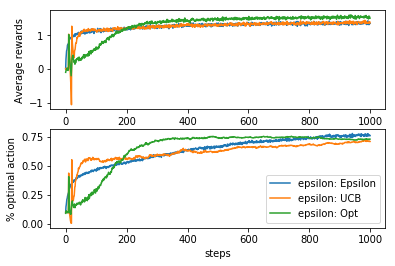

In [4]:
import  numpy as np
import matplotlib.pyplot as plt

num_arms = 10
fig, axs = plt.subplots(2)
def run(q_t, epsilon, episodes):
    q_true = q_t
    optimal_actions = np.argmax(q_true)
    action_counts = np.zeros(num_arms)
    q_pred = np.zeros(num_arms)
    episode_rewards = []
    opt_action_cnt = []    
    for eps in range(episodes):
        
        if np.random.random() < epsilon:
            action_index = np.random.randint(num_arms)
        else:
            greedy = np.argmax(q_pred)
            actions = np.where(q_pred == np.argmax(q_pred))[0]
            
            if len(actions) == 0:
                action_index = greedy
            else:
                action_index = np.random.choice(actions)
        
        if action_index == optimal_actions:
            opt_action_cnt.append(1)
        else:opt_action_cnt.append(0)      
        
        reward = np.random.normal(q_true[action_index])
        
        action_counts[action_index] += 1
        # alpha = 1 / action_counts[action_index]
        alpha = 0.1
        q_pred[action_index] = q_pred[action_index] +\
                        alpha * (reward-q_pred[action_index])
        
        episode_rewards.append(reward)
        q_true += np.random.normal(0.0, 0.01)
    
    return episode_rewards, opt_action_cnt

def get_ucb_action(q_pred, step, action_counts, c_=2.0):
    value = q_pred + c_ * (np.log(step+1) / (action_counts+1e-4))**0.5
    action_index = np.argmax(value)
    return action_index

def run_ucb(q_true, epsilon, episodes):
    optimal_actions = np.argmax(q_true)
    action_counts = np.zeros(num_arms)
    q_pred = np.zeros(num_arms)
    episode_rewards = []
    opt_action_cnt = []
    for eps in range(episodes):
        action_index = get_ucb_action(q_pred, eps, action_counts)         
        reward = np.random.normal(q_true[action_index])
        if action_index == optimal_actions:
            opt_action_cnt.append(1)
        else:opt_action_cnt.append(0)

        action_counts[action_index] += 1
#         alpha = 1 / action_counts[action_index]
        alpha = 0.1
        q_pred[action_index] = q_pred[action_index] +\
                        alpha * (reward-q_pred[action_index])
        
        episode_rewards.append(reward)
        q_true += np.random.normal(0.0, 0.01)
    
    return episode_rewards, opt_action_cnt

def run_greedy(q_t, episodes):
    optimal_actions = np.argmax(q_t)
    action_counts = np.zeros(num_arms)
    q_pred = np.zeros(num_arms) + 5.

    episode_rewards = []
    q_true = q_t
    opt_action_cnt = []
    for eps in range(episodes):
    
     
        action_index = np.argmax(q_pred)
        if action_index == optimal_actions:
            opt_action_cnt.append(1)
        else:opt_action_cnt.append(0)
    
        reward = np.random.normal(q_true[action_index])
    

        action_counts[action_index] += 1
#         alpha = 1 / action_counts[action_index]
        alpha = 0.1
        q_pred[action_index] = q_pred[action_index] +\
                        alpha * (reward-q_pred[action_index])
        
        episode_rewards.append(reward)
        q_true += np.random.normal(0.0, 0.01, num_arms)
    return episode_rewards, opt_action_cnt

def run_env():
    num_bandits = 2000
    num_episodes = 1000
    num_arms = 10
#     epsilons = [0, 0.1, 0.01]
    epsilons = {'Epsilon': 0.1, 'UCB':1.0, 'Opt': 0.1}
    for eps in epsilons:
        print('Running: ', eps)
        episode_rew = np.zeros(num_episodes)
        episode_cnt = np.zeros(num_episodes)
        if eps == 'Epsilon':
            for i in range(num_bandits):
                q_true = np.random.normal(0.0, 1.0, num_arms)

                if i % 100 == 0:
                    print('iteration : ', i)
                rew, cnt = run(q_true, epsilons[eps], num_episodes)
                episode_rew += np.array(rew)
                episode_cnt += np.array(cnt)
            
            avg_rew = episode_rew / num_bandits
            avg_cnt = episode_cnt / num_bandits
        elif eps == 'UCB':
            for i in range(num_bandits):
                q_true = np.random.normal(0.0, 1.0, num_arms)

                if i % 100 == 0:
                    print('iteration : ', i)
                rew, cnt = run_ucb(q_true, epsilons[eps], num_episodes)
                episode_rew += np.array(rew)
                episode_cnt += np.array(cnt)
            avg_rew = episode_rew / num_bandits
            avg_cnt = episode_cnt / num_bandits
        
        elif eps == 'Opt':
            for i in range(num_bandits):
                q_true = np.random.normal(0.0, 1.0, num_arms)
                if i % 100 == 0:
                    print('iteration ', i)

                rew, cnt  = run_greedy(q_true, num_episodes)
                episode_rew += np.array(rew)
                episode_cnt += np.array(cnt)
            
            avg_rew  = episode_rew / num_bandits 
            avg_cnt = episode_cnt / num_bandits


        axs[0].set_xlabel("steps")
        axs[0].set_ylabel("Average rewards")
        axs[0].plot(avg_rew, label = 'epsilon: {}'.format(eps))
        axs[1].set_xlabel("steps")
        axs[1].set_ylabel("% optimal action")
        axs[1].plot(avg_cnt, label = 'epsilon: {}'.format(eps))
    plt.legend()
    plt.show()
            
run_env()   

